In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content


drive  sample_data


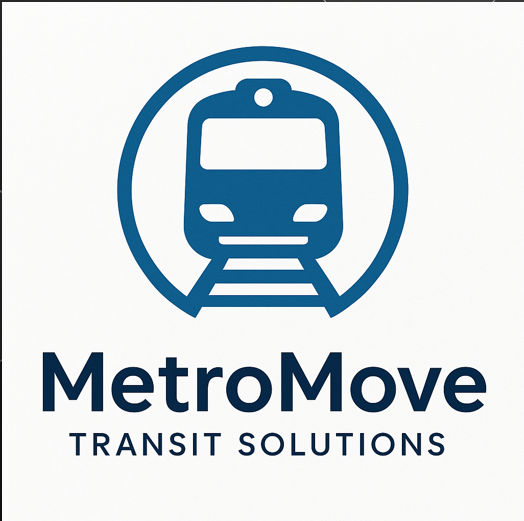

In [ ]:
from IPython.display import Image, display
display(Image(filename="//content/drive/MyDrive/Copy of MetroMove.png", width=260))


# MetroMove Transit Solutions  
## Exploratory Data Analysis

**Author:** Lauretta Oghenevurie  
**Email:** Laureldebelle@gmail.com  

---

### Skills Demonstrated
- Python (Pandas, NumPy)
- Exploratory Data Analysis (EDA)
- Data Visualisation
- Operational & Spatial Insights

---

### Project Sections
1. Introduction & Business Context  
2. Data Cleaning & Preparation  
3. Descriptive Statistics
4. Exploratory Data Analysis (Univariate, Bivariate and Temporal Analysis)  
5. Operational & Spatial Insights  
6. EDA Summary
7. Strategic Recommendations


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path


#1.  **INTRODUCTION & BUSINESS CONTEXT**

This exploratory data analysis assesses public transport trip data for MetroMove Transit Solutions to uncover passenger demand patterns, evaluate service performance across transport modes, and identify key drivers of customer experience. The analysis focuses on passenger volumes, fare structures, trip duration, and temporal dynamics, including time-of-day and day-of-week travel behaviour, with the aim of generating actionable operational and planning insights.

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Public_Transport_Trips_EDA(1).xlsx')

In [ ]:
from pathlib import Path
DATA_PATH = Path('/content/drive/MyDrive/Public_Transport_Trips_EDA(1).xlsx')
df = pd.read_excel(DATA_PATH)


In [ ]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


# 2. **DATA CLEANING & PREPARATION**

The dataset was reviewed and cleaned to ensure consistency, accuracy, and reliability for analysis. This process focused on standardising text values, correcting formatting inconsistencies, and preparing key variables for meaningful exploratory analysis.


**Mode of Transport**:-In this step, I standardised the Mode of Transport column by correcting inconsistent text formatting.
All transport modes were updated to use a consistent naming convention (e.g., Bus, Ferry, Train, Tram) to ensure accurate grouping and analysis.

In [ ]:
df['Mode_of_Transport'] = df['Mode_of_Transport'].replace(['FERRY','fErry'], 'Ferry')
df['Mode_of_Transport'] = df['Mode_of_Transport'].replace('TRAM', 'Tram')
df['Mode_of_Transport'] = df['Mode_of_Transport'].replace('train', 'Train')
df['Mode_of_Transport'] = df['Mode_of_Transport'].replace(['bus','BUS'], 'Bus')


In [ ]:
df['Mode_of_Transport'].value_counts()


,count
Mode_of_Transport,
Bus,332
Ferry,287
Train,243
Tram,138


In [ ]:
df['Departure_Station'].value_counts()


,count
Departure_Station,
North Station,171
Downtown,167
West End,159
Central,158
Airport,157
South Point,138
Central,50


**Arrival Station**:- The Arrival Station column was reviewed for inconsistent text formatting and standardised to ensure uniform station naming.


In [ ]:
df['Arrival_Station'].value_counts().head()


,count
Arrival_Station,
South Point,171
Downtown,168
West End,163
Airport,163
Central,160


In [ ]:
df['Arrival_Station'] = df['Arrival_Station'].replace('airport', 'Airport')

In [ ]:
df['Arrival_Station'].value_counts()


,count
Arrival_Station,
Airport,213
South Point,171
Downtown,168
West End,163
Central,160
North Station,125


**Departure Time**:- The date component of the Departure_Time column was removed, retaining only the time of departure. This ensures the variable accurately represents departure timing without introducing incorrect date information.

In [ ]:
df['Departure_Time'].value_counts()


,count
Departure_Time,
2024-01-01 22:39:00,1
2024-01-01 06:00:00,1
2024-01-01 06:01:00,1
2024-01-01 06:02:00,1
2024-01-01 06:03:00,1
...,...
2024-01-01 06:12:00,1
2024-01-01 06:11:00,1
2024-01-01 06:10:00,1


In [ ]:
# Ensure Departure_Time is datetime
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"])

# Extract hour of day (0–23)
df["Departure_Hour"] = df["Departure_Time"].dt.hour

# Cyclical encoding
df["Departure_Hour_sin"] = np.sin(2 * np.pi * df["Departure_Hour"] / 24)
df["Departure_Hour_cos"] = np.cos(2 * np.pi * df["Departure_Hour"] / 24)

# Drop original time column AFTER feature engineering
df = df.drop(columns=["Departure_Time"])


In [ ]:
df[["Departure_Hour", "Departure_Hour_sin", "Departure_Hour_cos"]].head()

,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos
0,6,1.0,6.123234e-17
1,6,1.0,6.123234e-17
2,6,1.0,6.123234e-17
3,6,1.0,6.123234e-17
4,6,1.0,6.123234e-17


In [ ]:
df["Departure_Hour"].nunique()

17

In [ ]:
df[["Departure_Hour", "Departure_Hour_sin", "Departure_Hour_cos"]].head().round(3)

,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos
0,6,1.0,0.0
1,6,1.0,0.0
2,6,1.0,0.0
3,6,1.0,0.0
4,6,1.0,0.0


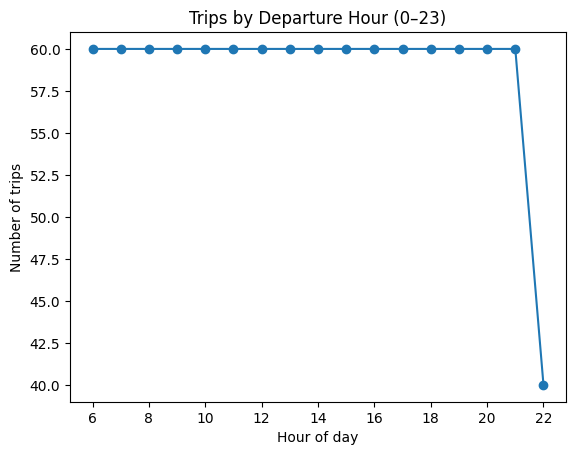

In [ ]:
import matplotlib.pyplot as plt

hour_counts = df["Departure_Hour"].value_counts().sort_index()
hour_counts.plot(kind="line", marker="o")
plt.xlabel("Hour of day")
plt.ylabel("Number of trips")
plt.title("Trips by Departure Hour (0–23)")
plt.show()

In [ ]:
df['Departure_Hour'].head()


,Departure_Hour
0,6
1,6
2,6
3,6
4,6


### Cleaning & Feature Engineering Decision

The original `Departure_Time` column contained full timestamps, including a date component that was not required for this analysis. To improve interpretability and focus on temporal travel patterns, the timestamp was converted to a discrete hour-of-day variable (`Departure_Hour`).

In addition, cyclical encoding using sine and cosine transformations was applied to the departure hour to preserve the circular nature of time (e.g., 23:00 and 00:00 being temporally adjacent). While exploratory analysis was conducted using the discrete hour variable for clarity, the cyclical features were retained to support potential future predictive modelling or optimisation tasks.

Following feature extraction, the original timestamp column was removed to avoid redundancy.

In [ ]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos
0,TRIP0001,Ferry,West End,Airport,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F,6,1.0,6.123234e-17
1,TRIP0002,Tram,North Station,Downtown,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F,6,1.0,6.123234e-17
2,TRIP0003,Bus,Central,North Station,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F,6,1.0,6.123234e-17
3,TRIP0004,Ferry,Downtown,Central,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F,6,1.0,6.123234e-17
4,TRIP0005,Ferry,Downtown,Central,66.0,NaN,NaN,2024-01-01,Monday,NaN,F,6,1.0,6.123234e-17


**PASSENGER COUNT**

The Passenger_Count column was reviewed to assess data quality and identify missing values.
As the column represents individual passengers, values were converted from floating-point format to integers to ensure consistency and interpretability before further analysis.

In [ ]:
df['Passenger_Count'].head()


,Passenger_Count
0,21.0
1,46.0
2,91.0
3,27.0
4,66.0


In [ ]:
df['Passenger_Count'] = pd.to_numeric(df['Passenger_Count'], errors='coerce').astype('Int64')


In [ ]:
df['Passenger_Count'].head()


,Passenger_Count
0,21
1,46
2,91
3,27
4,66


**Checking for Missing Values**

The passenger count data was examined for null values to determine whether imputation was required.

In [ ]:
df['Passenger_Count'].isnull().sum()


np.int64(100)

**Passenger Count by Mode of Transport (Tram)**

Passenger counts were isolated for tram services to allow mode-specific analysis rather than applying a single imputation strategy across all transport types.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Tram', ['Mode_of_Transport', 'Passenger_Count']]


,Mode_of_Transport,Passenger_Count
1,Tram,46
14,Tram,81
19,Tram,20
26,Tram,58
30,Tram,<NA>
...,...,...
959,Tram,64
962,Tram,76
981,Tram,36
993,Tram,36


**Distribution of Passenger Count for Tram**

A histogram was used to examine the distribution of passenger counts for tram services and assess the shape of the data.

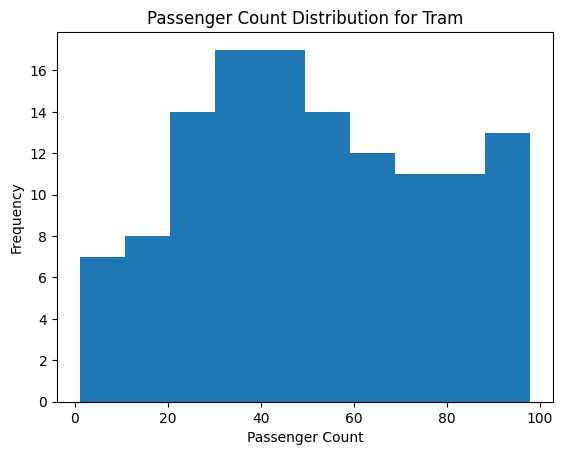

In [ ]:

plt.hist(
    df.loc[df['Mode_of_Transport'] == 'Tram', 'Passenger_Count'].dropna(),
    bins=10
)

plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Passenger Count Distribution for Tram')
plt.show()


**Imputation Strategy for Tram Passenger Counts**

The distribution of tram passenger counts was right-skewed.
To reduce the influence of extreme values, the median passenger count was selected as an appropriate measure for imputing missing values.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Tram', 'Passenger_Count'].median()


np.float64(49.0)

**Filling Missing Passenger Counts for Tram**

Missing passenger count values for tram services were filled using the median value derived from observed tram passenger data.

In [ ]:
tram_median = df.loc[df['Mode_of_Transport'] == 'Tram', 'Passenger_Count'].median()

df.loc[
    (df['Mode_of_Transport'] == 'Tram') & (df['Passenger_Count'].isna()),
    'Passenger_Count'
] = tram_median


In [ ]:
df.loc[df['Mode_of_Transport'] == 'Tram', 'Passenger_Count'].isna().sum()


np.int64(0)

**Passenger Count by Mode of Transport (Bus)**

Passenger counts were isolated for bus services to allow mode-specific analysis and avoid applying a single imputation strategy across all transport types.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Bus', ['Mode_of_Transport', 'Passenger_Count']]


,Mode_of_Transport,Passenger_Count
2,Bus,91
6,Bus,13
13,Bus,12
17,Bus,34
23,Bus,70
...,...,...
971,Bus,47
973,Bus,19
992,Bus,1
994,Bus,35


**Distribution of Passenger Count for Bus**

A histogram was used to examine the distribution of passenger counts for bus services and assess the shape of the data.

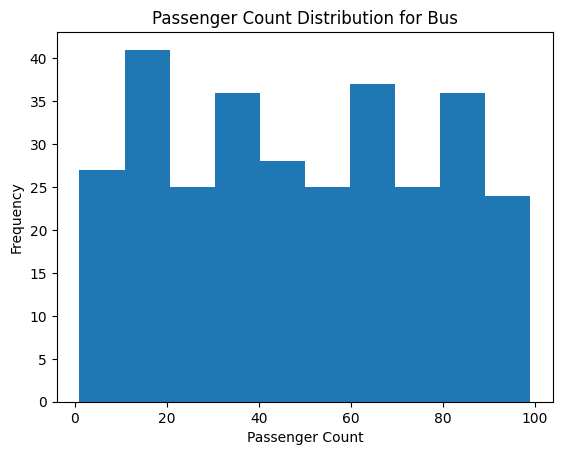

In [ ]:
plt.hist(
    df.loc[df['Mode_of_Transport'] == 'Bus', 'Passenger_Count'].dropna(),
    bins=10
)

plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Passenger Count Distribution for Bus')
plt.show()


**Imputation Strategy for Bus Passenger Counts**

The passenger count distribution for bus services appears approximately symmetric, with values spread evenly across the range.
As a result, the mean passenger count was selected as an appropriate measure for imputing missing values.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Bus', 'Passenger_Count'].mean()

np.float64(49.13157894736842)

**Filling Missing Passenger Counts for Bus**

As passenger counts represent individuals, the mean value was rounded to the nearest whole number before being used to impute missing values.

In [ ]:
bus_mean = round(
    df.loc[df['Mode_of_Transport'] == 'Bus', 'Passenger_Count'].mean()
)

df.loc[
    (df['Mode_of_Transport'] == 'Bus') & (df['Passenger_Count'].isna()),
    'Passenger_Count'
] = bus_mean


In [ ]:
bus_mean
df.loc[df['Mode_of_Transport'] == 'Bus', 'Passenger_Count'].isna().sum()


np.int64(0)

**Passenger Count by Mode of Transport (Train)**

Passenger counts were isolated for train services to allow mode-specific analysis and ensure that missing values are handled appropriately for this transport type.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Train', ['Mode_of_Transport', 'Passenger_Count']]


,Mode_of_Transport,Passenger_Count
8,Train,36
16,Train,14
18,Train,53
20,Train,75
21,Train,16
...,...,...
985,Train,15
986,Train,37
987,Train,13
995,Train,<NA>


**Distribution of Passenger Count for Train**

A histogram was used to examine the distribution of passenger counts for train services and assess the shape of the data.

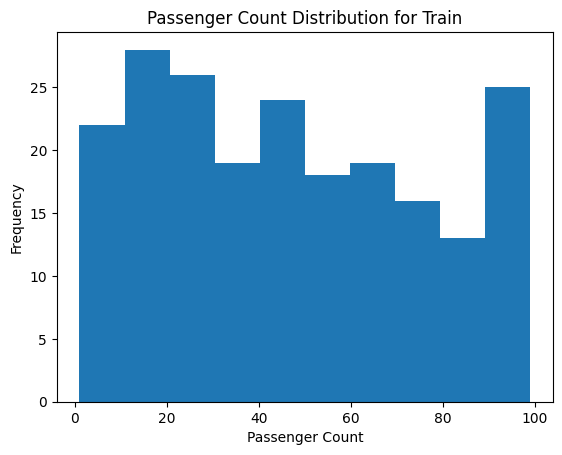

In [ ]:
plt.hist(
    df.loc[df['Mode_of_Transport'] == 'Train', 'Passenger_Count'].dropna(),
    bins=10
)

plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Passenger Count Distribution for Train')
plt.show()


**Imputation Strategy for Train Passenger Counts**


The passenger count distribution for train services appears approximately symmetric.
As a result, the mean passenger count was selected for imputing missing values.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Train', 'Passenger_Count'].mean()


np.float64(46.90952380952381)

**Filling Missing Passenger Counts for Train**

Missing passenger count values for train services were filled using the mean passenger count derived from observed train passenger data.

In [ ]:
train_mean = round(
    df.loc[df['Mode_of_Transport'] == 'Train', 'Passenger_Count'].mean()
)

df.loc[
    (df['Mode_of_Transport'] == 'Train') & (df['Passenger_Count'].isna()),
    'Passenger_Count'
] = train_mean


In [ ]:
df.loc[df['Mode_of_Transport'] == 'Train', 'Passenger_Count'].isna().sum()


np.int64(0)

**Passenger Count by Mode of Transport (Ferry)**

Missing passenger count values for train services were filled using the mean passenger count derived from observed train passenger data.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Ferry', ['Mode_of_Transport', 'Passenger_Count']]


,Mode_of_Transport,Passenger_Count
0,Ferry,21
3,Ferry,27
4,Ferry,66
5,Ferry,41
7,Ferry,9
...,...,...
988,Ferry,8
989,Ferry,5
990,Ferry,60
991,Ferry,73


**Distribution of Passenger Count for Ferry**

A histogram was used to examine the distribution of passenger counts for ferry services and assess the shape of the data.

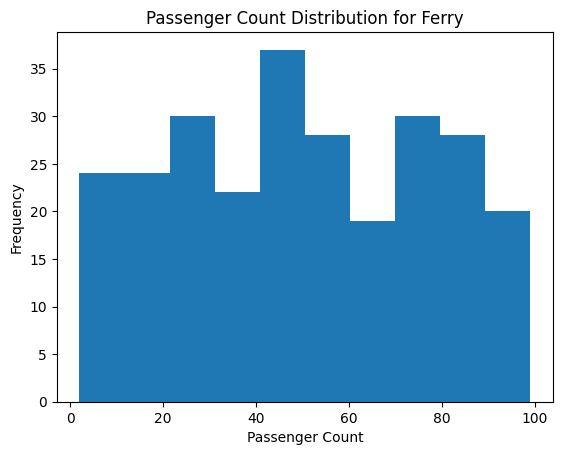

In [ ]:
plt.hist(
    df.loc[df['Mode_of_Transport'] == 'Ferry', 'Passenger_Count'].dropna(),
    bins=10
)

plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Passenger Count Distribution for Ferry')
plt.show()


**Imputation Strategy for Ferry Passenger Counts**

The passenger count distribution for ferry services appears approximately symmetric.
Accordingly, the mean passenger count was selected for imputing missing values.

In [ ]:
df.loc[df['Mode_of_Transport'] == 'Ferry', 'Passenger_Count'].median()

np.float64(48.0)

**Filling Missing Passenger Counts for Ferry**

Missing passenger count values for ferry services were filled using the median passenger count derived from observed ferry passenger data.

In [ ]:
ferry_median = round(
    df.loc[df['Mode_of_Transport'] == 'Ferry', 'Passenger_Count'].median()
)

df.loc[
    (df['Mode_of_Transport'] == 'Ferry') & (df['Passenger_Count'].isna()),
    'Passenger_Count'
] = ferry_median


In [ ]:
df.loc[df['Mode_of_Transport'] == 'Ferry', 'Passenger_Count'].isna().sum()


np.int64(0)

**Summary of Passenger Count Imputation**

Missing passenger count values were handled using a distribution-driven, mode-specific approach.
Passenger counts were analysed separately for each mode of transport, and the choice of imputation statistic was guided by the shape of the distribution observed in each case.

For skewed distributions, the median was used to provide a robust estimate, while for reasonably balanced distributions, the mean was selected.
Where mean or median values resulted in non-integer values, these were rounded to the nearest whole number to reflect that passenger counts represent individual people.

This approach ensures that imputed values remain statistically appropriate, consistent with observed patterns, and interpretable within the context of public transport usage.

**FARE AMOUNT**

Fare values were cleaned and missing entries were imputed within each mode of transport to preserve mode-specific pricing patterns.
An imputation value was chosen per mode using distribution cues: mode for strongly repeated fares, median for skewed fares, and mean for reasonably balanced fares

In [ ]:
# 1) Ensure Fare_Amount is numeric (float)
df['Fare_Amount'] = pd.to_numeric(df['Fare_Amount'], errors='coerce')

# 2) Choose ONE fill value per mode of transport
fare_fill_map = {}

for mode in df['Mode_of_Transport'].dropna().unique():
    fares = df.loc[df['Mode_of_Transport'] == mode, 'Fare_Amount'].dropna()

    # If a mode has no valid fares, skip
    if fares.empty:
        fare_fill_map[mode] = np.nan
        continue

    # A) If one fare value occurs very frequently, treat fares as discrete → use MODE
    top_share = fares.value_counts(normalize=True).iloc[0]
    if top_share >= 0.25:
        fill_value = fares.mode().iloc[0]

    # B) If fares are strongly skewed → use MEDIAN
    elif abs(fares.skew()) >= 1.0:
        fill_value = fares.median()

    # C) Otherwise (reasonably balanced) → use MEAN
    else:
        fill_value = fares.mean()

    fare_fill_map[mode] = float(fill_value)

# 3) Fill missing fares using the chosen value for each mode
df['Fare_Amount'] = df['Fare_Amount'].fillna(df['Mode_of_Transport'].map(fare_fill_map))

# 4) Round to 2 decimal places (keeps float dtype)
df['Fare_Amount'] = df['Fare_Amount'].round(2)


In [ ]:
df['Fare_Amount'].isna().sum()


np.int64(0)

**Mode-Specific Fare Imputation Values**

To make the imputation process transparent, the final fare values selected for each mode of transport are summarised below.
These values represent the central tendency (mean, median, or mode) chosen for each transport mode based on the observed fare distribution.

In [ ]:
fare_fill_map


{'Ferry': 24.38788277220304,
 'Tram': 25.240595740143903,
 'Bus': 25.621146615721578,
 'Train': 26.262932219558323}

In [ ]:
fare_fill_map = {k: round(v, 2) for k, v in fare_fill_map.items()}


In [ ]:
pd.DataFrame.from_dict(
    fare_fill_map,
    orient='index',
    columns=['Imputed_Fare_Amount']
)


,Imputed_Fare_Amount
Ferry,24.39
Tram,25.24
Bus,25.62
Train,26.26


**Summary of Fare Amount Imputation**

Missing fare values were handled using a mode-specific, distribution-driven approach.
Fare amounts were analysed separately for each mode of transport to preserve differences in pricing structures across services.

While passenger count imputation was carried out step by step to explicitly demonstrate how distribution shape informs the choice of central tendency, fare amount imputation was implemented using an automated, rule-based pipeline. This approach applies the same underlying principles, selecting the mean, median, or mode based on distribution characteristics but does so programmatically for efficiency and scalability.

By automating the process, consistent and statistically appropriate imputation decisions were applied across all transport modes without manual repetition. All imputed fare values were rounded to two decimal places to ensure interpretability and alignment with standard currency formatting.

This strategy balances transparency with efficiency and reflects a practical approach to handling missing data in larger, real-world datasets.

In [ ]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos
0,TRIP0001,Ferry,West End,Airport,21,4.34,26.0,2024-01-01,Sunday,NaN,F,6,1.0,6.123234e-17
1,TRIP0002,Tram,North Station,Downtown,46,20.67,134.0,2024-01-01,Saturday,NaN,F,6,1.0,6.123234e-17
2,TRIP0003,Bus,Central,North Station,91,25.62,NaN,2024-01-01,Tuesday,NaN,F,6,1.0,6.123234e-17
3,TRIP0004,Ferry,Downtown,Central,27,3.77,NaN,2024-01-01,Sunday,NaN,F,6,1.0,6.123234e-17
4,TRIP0005,Ferry,Downtown,Central,66,24.39,NaN,2024-01-01,Monday,NaN,F,6,1.0,6.123234e-17


**TRIP DURATION MINUTES**

The Trip_Duration_Minutes column represents the length of each trip in minutes.
To ensure consistency and interpretability, trip durations were treated as whole numbers and missing values were handled using a mode-specific, distribution-driven approach.

Preparing Trip Duration Data

In [ ]:
# Ensure Trip_Duration_Minutes is numeric
df['Trip_Duration_Minutes'] = pd.to_numeric(
    df['Trip_Duration_Minutes'],
    errors='coerce'
)


**Mode-Specific Trip Duration Imputation**


Trip duration patterns vary by mode of transport.
To preserve these differences, missing trip duration values were imputed separately for each transport mode using an automated, rule-based pipeline.

In [ ]:
trip_duration_fill_map = {}

for mode in df['Mode_of_Transport'].dropna().unique():
    durations = df.loc[
        df['Mode_of_Transport'] == mode,
        'Trip_Duration_Minutes'
    ].dropna()

    if durations.empty:
        trip_duration_fill_map[mode] = np.nan
        continue

    # If a single duration value dominates → use MODE
    top_share = durations.value_counts(normalize=True).iloc[0]
    if top_share >= 0.25:
        fill_value = durations.mode().iloc[0]

    # If distribution is strongly skewed → use MEDIAN
    elif abs(durations.skew()) >= 1.0:
        fill_value = durations.median()

    # Otherwise → use MEAN
    else:
        fill_value = durations.mean()

    trip_duration_fill_map[mode] = round(fill_value)


Filling Missing Trip Duration Values

In [ ]:
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(
    df['Mode_of_Transport'].map(trip_duration_fill_map)
).astype('Int64')


**Mode-Specific Trip Duration Imputation Values**

To improve transparency, the final trip duration values used to impute missing data for each mode of transport are summarised below.

In [ ]:
trip_duration_fill_map


{'Ferry': 92, 'Tram': 95, 'Bus': 96, 'Train': 94}

In [ ]:
pd.DataFrame.from_dict(
    trip_duration_fill_map,
    orient='index',
    columns=['Imputed_Trip_Duration_Minutes']
)


,Imputed_Trip_Duration_Minutes
Ferry,92
Tram,95
Bus,96
Train,94


**Summary of Trip Duration Imputation**

Missing trip duration values were handled using an automated, mode-specific imputation pipeline.
Trip durations were analysed separately for each mode of transport, and appropriate measures of central tendency were applied based on the distribution of observed values within each mode.

All imputed trip duration values were rounded to whole minutes to reflect practical trip timing and maintain consistency across the dataset.

**TRIP DATE**

The Trip_Date column contains full date information in the format YYYY-MM-DD.
As all trips occur within the same year (2024), the year component does not add analytical value.
Instead, only the month of travel is retained to support seasonal and temporal analysis.

**Extracting Departure Month**

The month was extracted from Trip_Date and stored in a new column, Departure_Month, with month names written in full for readability.

In [ ]:
# Ensure Trip_Date is in datetime format
df['Trip_Date'] = pd.to_datetime(df['Trip_Date'], errors='coerce')

# Extract month name
df['Departure_Month'] = df['Trip_Date'].dt.month_name()


**Removing Redundant Date Column**

After extracting the required information, the original Trip_Date column was removed to avoid redundancy.

In [ ]:
df = df.drop(columns=['Trip_Date'])


In [ ]:
df['Departure_Month'].value_counts()


,count
Departure_Month,
January,744
February,256


**Removing Redundant Columns**

Columns that do not contribute to the analysis were removed to reduce redundancy and ensure the dataset remains focused, interpretable, and suitable for accurate analysis.

In [ ]:
df = df.drop(columns=['Unnamed: 10', 'Unnamed: 11'], errors='ignore')



**Final Data Validation**

A final validation check was performed to confirm that all missing values had been addressed across the dataset.

In [ ]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Day_of_Week,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos,Departure_Month
0,TRIP0001,Ferry,West End,Airport,21,4.34,26,Sunday,6,1.0,6.123234e-17,January
1,TRIP0002,Tram,North Station,Downtown,46,20.67,134,Saturday,6,1.0,6.123234e-17,January
2,TRIP0003,Bus,Central,North Station,91,25.62,96,Tuesday,6,1.0,6.123234e-17,January
3,TRIP0004,Ferry,Downtown,Central,27,3.77,92,Sunday,6,1.0,6.123234e-17,January
4,TRIP0005,Ferry,Downtown,Central,66,24.39,92,Monday,6,1.0,6.123234e-17,January


In [ ]:
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Day_of_Week,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos,Departure_Month
995,TRIP0996,Train,North Station,West End,47,40.55,51,Saturday,22,-0.5,0.866025,February
996,TRIP0997,Bus,Central,West End,63,7.77,35,Thursday,22,-0.5,0.866025,February
997,TRIP0998,Ferry,West End,North Station,23,24.39,8,Saturday,22,-0.5,0.866025,February
998,TRIP0999,Tram,South Point,Central,9,43.30,169,Sunday,22,-0.5,0.866025,February
999,TRIP1000,Train,Airport,West End,34,8.17,21,Tuesday,22,-0.5,0.866025,February


In [ ]:
df.isna().sum().sum()


np.int64(0)

In [ ]:
df.sample()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Day_of_Week,Departure_Hour,Departure_Hour_sin,Departure_Hour_cos,Departure_Month
906,TRIP0907,Ferry,North Station,West End,48,34.04,114,Wednesday,21,-0.707107,0.707107,February


**Data Cleaning Summary and Next Steps**

The data cleaning process involved standardising categorical variables, correcting data types, handling missing values using statistically appropriate and mode-specific strategies, and extracting meaningful temporal features. Redundant and unnecessary columns were removed to streamline the dataset.

Following a final validation check confirming the absence of missing values, the dataset is now fully prepared for analysis. The next step is to proceed with exploratory data analysis to examine patterns, relationships, and trends within the cleaned data.

# **3. DESCRIPTIVE STATISTICS**

Descriptive statistics are used to summarise key characteristics of trips for each mode of transport.
This provides a baseline understanding of passenger demand, fare levels, and trip durations across buses, trains, ferries, and trams, and supports meaningful comparisons between modes.

The analysis focuses on:

1. Passenger_Count

2. Fare_Amount

3. Trip_Duration_Minutes

These summaries help highlight typical values, variability, and potential differences in operational performance across transport types.

In [ ]:
df.groupby('Mode_of_Transport')[[
    'Passenger_Count',
    'Fare_Amount',
    'Trip_Duration_Minutes'
]].describe()


Passenger_Count                                          \
                            count       mean        std  min    25%   50%   
Mode_of_Transport                                                           
Bus                         332.0  49.120482  26.884961  1.0  26.75  49.0   
Ferry                       287.0  49.839721  25.762269  2.0   30.0  48.0   
Train                       243.0  46.921811  27.017404  1.0   25.5  47.0   
Tram                        138.0  50.971014   24.52228  1.0  34.25  49.0   

                               Fare_Amount             ...                  \
                     75%   max       count       mean  ...      75%    max   
Mode_of_Transport                                      ...                   
Bus                 70.0  99.0       332.0  25.620904  ...  36.6375  49.88   
Ferry               70.0  99.0       287.0  24.388118  ...  36.8200  49.86   
Train               64.5  99.0       243.0  26.262798  ...  35.5100  49.95   
Tram               68.75  98.0       138.0  25.240507  ...  37.0900  49.57   

                  Trip_Duration_Minutes                                    \
                                  count       mean        std  min    25%   
Mode_of_Transport                                                           
Bus                               332.0  96.189759  47.717923  5.0   57.5   
Ferry                             287.0  91.627178  48.267289  5.0   52.0   
Train                             243.0  94.333333  48.624213  8.0   50.5   
Tram                              138.0  95.065217  47.547165  8.0  58.25   

                                        
                    50%     75%    max  
Mode_of_Transport                       
Bus                96.0   132.0  179.0  
Ferry              92.0   126.5  179.0  
Train              94.0   136.0  179.0  
Tram               95.0  133.25  179.0  

[4 rows x 24 columns]

### Key Insights from Descriptive Statistics by Mode of Transport

The descriptive statistics above provide an initial overview of how **passenger demand, fare pricing, and trip duration** vary across MetroMove’s transport modes.

From the results, several observations can be made:

- **Data coverage differs by mode**, with bus services having the highest number of recorded trips, followed by ferry and train services, while tram services have the fewest observations. This indicates that bus operations are more heavily represented in the dataset, and tram-related insights should be interpreted with additional caution.

- **Passenger demand is broadly consistent across transport modes.** Mean and median passenger counts are closely aligned for all modes, suggesting relatively stable and predictable usage patterns with no strong evidence of extreme overcrowding or underutilisation in any single mode.

- **Fare amounts show minimal variation across modes.** The close alignment between mean and median fare values indicates a controlled and consistent pricing structure, with only minor differences between transport types.

- **Trip duration exhibits greater variability than passenger count or fare amount.** While average trip durations are similar across modes, the wider range of values suggests that journey length is more influenced by route characteristics and network design rather than passenger behaviour or pricing strategy.

Overall, these statistics establish a quantitative baseline for understanding MetroMove’s operations. They confirm data reliability, highlight differences in service characteristics, and provide the foundation for deeper exploratory analysis in subsequent steps.


### Mean and Median Summary by Mode of Transport

To support quicker comparison across transport modes, the next step calculates the **mean and median** for **Passenger Count**, **Fare Amount**, and **Trip Duration (Minutes)** within each mode. This provides a clear view of typical demand, pricing, and journey length while limiting the influence of extreme values.


In [ ]:
df.groupby('Mode_of_Transport').agg(
    Passenger_Count_Mean=('Passenger_Count', 'mean'),
    Passenger_Count_Median=('Passenger_Count', 'median'),
    Fare_Amount_Mean=('Fare_Amount', 'mean'),
    Fare_Amount_Median=('Fare_Amount', 'median'),
    Trip_Duration_Mean=('Trip_Duration_Minutes', 'mean'),
    Trip_Duration_Median=('Trip_Duration_Minutes', 'median')
)


,Passenger_Count_Mean,Passenger_Count_Median,Fare_Amount_Mean,Fare_Amount_Median,Trip_Duration_Mean,Trip_Duration_Median
Mode_of_Transport,,,,,,
Bus,49.120482,49.0,25.620904,25.62,96.189759,96.0
Ferry,49.839721,48.0,24.388118,24.39,91.627178,92.0
Train,46.921811,47.0,26.262798,26.26,94.333333,94.0
Tram,50.971014,49.0,25.240507,25.24,95.065217,95.0


### Key Observations from Mean and Median Performance Metrics

The table above summarises the **mean and median values** for passenger count, fare amount, and trip duration across each mode of transport. This focused comparison highlights how typical trips differ between services.

Several key observations emerge:

- **Passenger demand is broadly consistent across all modes.** Mean passenger counts range between approximately 47 and 51, with median values clustered around 48–49. This suggests that, on average, each transport mode serves a similar number of passengers per trip, with no single mode standing out as significantly over- or under-utilised.

- **Fare amounts remain relatively stable across transport modes.** Mean and median fares are closely aligned for all services, indicating minimal skewness and a consistent pricing structure. Train services show slightly higher average fares, while ferry services are marginally lower, but the overall differences are modest.

- **Trip duration varies slightly by mode, reflecting operational characteristics rather than demand behaviour.** Bus and tram services record marginally longer average trip durations, while ferry trips tend to be shorter on average. The close alignment between mean and median trip durations suggests that journey times are generally predictable within each mode.

Overall, these results indicate that MetroMove’s transport modes operate under **similar demand and pricing conditions**, with variation primarily driven by route design and service structure rather than passenger behaviour. This provides a clear baseline for further exploratory analysis into time-based patterns, route efficiency, and station-level performance.


# **4. EXPLORATORY DATA ANALYSIS (EDA)**

The exploratory data analysis focuses on uncovering patterns, trends, and relationships within the cleaned dataset to support MetroMove’s operational and strategic objectives.
This analysis examines passenger behaviour, trip performance, fare patterns, and temporal trends across different modes of transport.

By combining descriptive statistics and visual exploration, the EDA aims to identify differences in usage, efficiency, and pricing between transport modes, as well as factors that may impact customer experience and service optimisation.

# **BIVARIATE ANALYSIS**

### **Question 1: How does passenger demand vary across modes of transport?**

This analysis examines how passenger demand varies across different modes of transport. By comparing passenger counts by transport mode, MetroMove can assess whether certain services consistently carry more passengers per trip and identify differences in typical demand levels across the network.


In [ ]:
df.groupby('Mode_of_Transport').agg(
    Passenger_Count_Mean=('Passenger_Count', 'mean'),
    Passenger_Count_Median=('Passenger_Count', 'median')
)


,Passenger_Count_Mean,Passenger_Count_Median
Mode_of_Transport,,
Bus,49.120482,49.0
Ferry,49.839721,48.0
Train,46.921811,47.0
Tram,50.971014,49.0


Key observations:

- Tram records the highest average passenger demand (mean ≈ 51, median = 49).

- Bus and Ferry show similar demand levels, with mean passenger counts around 49–50.

- Train has the lowest average passenger count (mean ≈ 47, median = 47).

The close alignment between mean and median across all modes suggests relatively stable passenger demand with limited influence from extreme values.

Business insight:
Tram services appear to be the most heavily utilised per trip, while train services experience slightly lower passenger demand, which may inform capacity planning and service optimisation.

**Passenger Count Distribution by Mode of Transport**

To understand how passenger counts vary within each transport mode, a boxplot is used. This helps identify:

- spread and variability,

- median passenger count,

- presence of potential outliers across modes.

<Figure size 800x500 with 0 Axes>

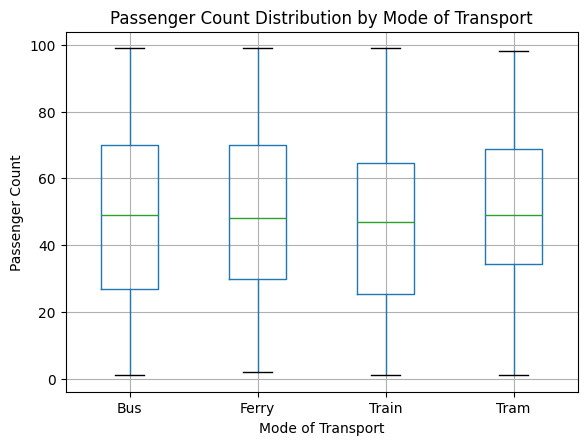

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='Passenger_Count', by='Mode_of_Transport')
plt.title('Passenger Count Distribution by Mode of Transport')
plt.suptitle('')  # Removes automatic pandas subtitle
plt.xlabel('Mode of Transport')
plt.ylabel('Passenger Count')
plt.show()


INTERPRETATION

The boxplot shows that median passenger counts are broadly similar across all transport modes, clustering around the mid-40s to low-50s range.

- Tram and Bus exhibit slightly higher median passenger counts, suggesting marginally higher typical occupancy.

- Train shows a slightly lower median and a wider spread, indicating more variability in passenger demand.

- All modes display wide ranges and overlapping interquartile ranges, implying that no single mode consistently dominates in passenger volume.

- The presence of low and high extremes across all modes suggests demand fluctuations, likely driven by time, route, or day-specific factors rather than mode alone.

Business implication: Passenger demand is relatively balanced across modes, so optimisation efforts should focus more on routes, timing, and frequency rather than prioritising a single transport mode.

**Question 2: Is there a relationship between passenger demand and fare amount across transport modes?**

Why this matters:
This helps MetroMove understand whether higher fares are associated with higher or lower passenger demand, which directly informs pricing strategy, revenue optimisation, and demand sensitivity.

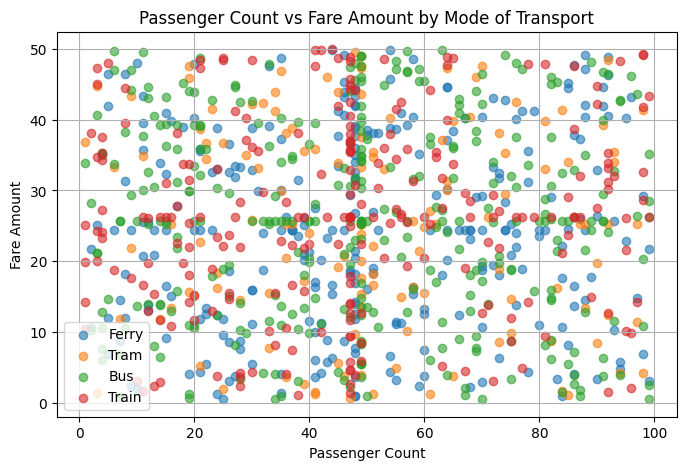

In [ ]:
plt.figure(figsize=(8, 5))

for mode in df['Mode_of_Transport'].unique():
    subset = df[df['Mode_of_Transport'] == mode]
    plt.scatter(
        subset['Passenger_Count'],
        subset['Fare_Amount'],
        label=mode,
        alpha=0.6
    )

plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Passenger Count vs Fare Amount by Mode of Transport')
plt.legend()
plt.grid(True)
plt.show()


Key Observations

The scatter plot shows a weak relationship between passenger count and fare amount across all modes of transport. Fare prices remain broadly distributed regardless of how many passengers are on a trip, indicating that fares are not directly driven by passenger volume.

Across modes (Bus, Ferry, Train, and Tram), fare amounts appear relatively stable within similar ranges, even as passenger counts increase. This suggests that pricing is likely influenced by fixed route characteristics, distance, or service type rather than demand-based pricing.

Business insight: MetroMove’s current fare structure appears largely volume-independent, meaning higher passenger counts do not automatically translate to higher fares. This highlights an opportunity to explore demand-responsive or peak-based pricing strategies to better align revenue with usage patterns.

**Question 3: How does trip duration relate to fare amount across different modes of transport?**

Why this matters:
This helps MetroMove understand whether longer journeys are priced higher and whether this relationship is consistent across transport modes.

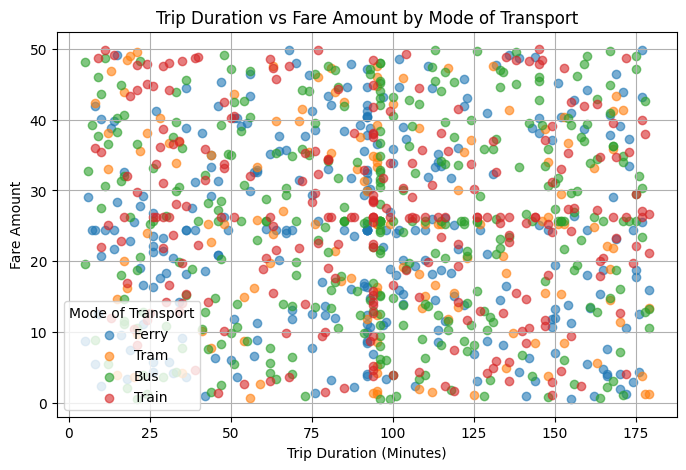

In [ ]:
plt.figure(figsize=(8, 5))

for mode in df['Mode_of_Transport'].unique():
    subset = df[df['Mode_of_Transport'] == mode]
    plt.scatter(
        subset['Trip_Duration_Minutes'],
        subset['Fare_Amount'],
        label=mode,
        alpha=0.6
    )

plt.title('Trip Duration vs Fare Amount by Mode of Transport')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount')
plt.legend(title='Mode of Transport')
plt.grid(True)
plt.show()


Key Observations:

The scatter plot shows a weak relationship between trip duration and fare amount across all modes of transport. Longer trips do not consistently correspond to higher fares, indicating that pricing is not strictly duration-based.

Fare amounts appear to be clustered within similar ranges regardless of trip length, suggesting the use of flat fares, zonal pricing, or mode specific pricing rules rather than time-based pricing.

This pattern is consistent across buses, trams, ferries, and trains, implying that other factors such as route type, service category, or demand likely play a stronger role in fare determination than trip duration alone.

**Question 4: Which routes (departure–arrival pairs) carry the highest passenger demand?**

Why this matters: Understanding passenger volume by route helps MetroMove identify high-demand corridors, prioritise capacity allocation, and optimise scheduling.

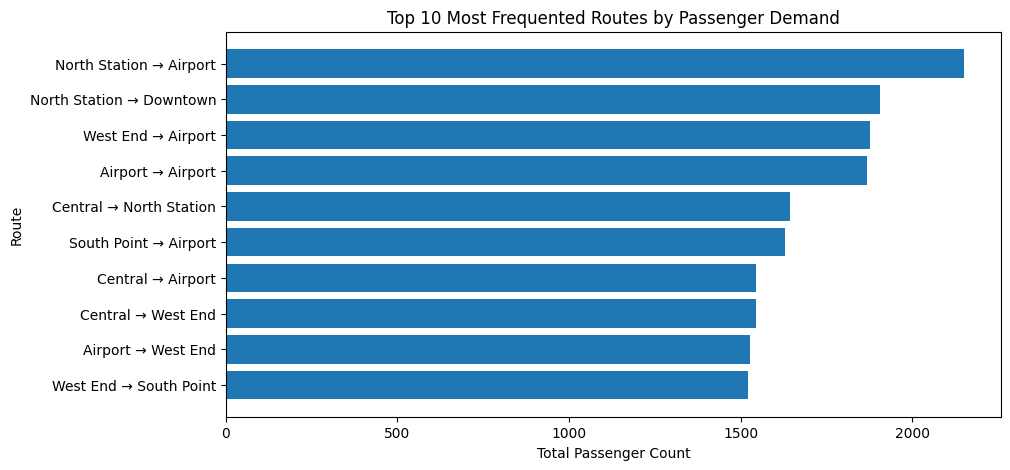

In [ ]:
route_demand = (
    df.groupby(['Departure_Station', 'Arrival_Station'])['Passenger_Count']
      .sum()
      .reset_index()
      .sort_values(by='Passenger_Count', ascending=False)
)

top_routes = route_demand.head(10)

top_routes = route_demand.head(10)

plt.figure(figsize=(10, 5))
plt.barh(
    top_routes['Departure_Station'] + " → " + top_routes['Arrival_Station'],
    top_routes['Passenger_Count']
)
plt.xlabel("Total Passenger Count")
plt.ylabel("Route")
plt.title("Top 10 Most Frequented Routes by Passenger Demand")
plt.gca().invert_yaxis()
plt.show()


Key Observations: Most Frequented Routes

- The results show that routes connected to the Airport dominate passenger demand. The North Station → Airport route records the highest passenger volume, followed closely by North Station → Downtown and West End → Airport.

- Central hubs such as North Station, Central, and West End appear repeatedly among the most frequented routes, indicating their role as key transfer and demand centres within the network.

- This suggests that passenger traffic is heavily concentrated around hub-to-airport and hub-to-hub corridors, highlighting priority routes for capacity planning, service frequency optimisation, and potential revenue maximisation.



Business Insight: MetroMove can prioritise high-demand hub–airport routes for increased service frequency, larger vehicle allocation, or targeted fare strategies, while also reviewing operational efficiency on these corridors to reduce congestion and improve passenger experience.

# **TEMPORAL ANALYSIS**

**Question 5: At what times of day does passenger demand peak?**

Why this matters:
Understanding peak travel periods helps MetroMove optimise service frequency, staffing levels, and resource allocation. Identifying high-demand time windows supports better scheduling decisions, reduces congestion during rush hours, and improves overall passenger experience.

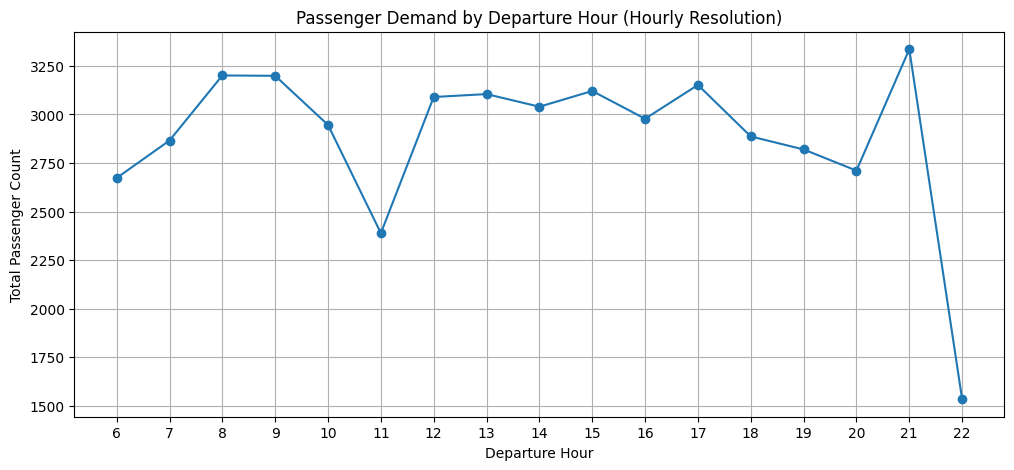

In [ ]:
# Passenger demand by departure hour (hourly resolution)
hourly_demand = (
    df.groupby("Departure_Hour")["Passenger_Count"]
      .sum()
      .reset_index()
      .sort_values("Departure_Hour")
)

plt.figure(figsize=(12, 5))
plt.plot(hourly_demand["Departure_Hour"], hourly_demand["Passenger_Count"], marker="o")
plt.title("Passenger Demand by Departure Hour (Hourly Resolution)")
plt.xlabel("Departure Hour")
plt.ylabel("Total Passenger Count")
plt.xticks(hourly_demand["Departure_Hour"])
plt.grid(True)
plt.show()

### Key Observations:

Passenger demand shows clear **time-of-day peaks**, with higher volumes during typical **morning (commuter) and late afternoon/early evening** periods.  
Demand is relatively lower during mid-day and drops sharply late at night, indicating reduced travel activity outside core commuting hours.

These patterns highlight opportunities for:
- Optimising service frequency during peak periods  
- Adjusting capacity allocation to match demand  
- Improving operational efficiency during off-peak hours


**Question 6: How does passenger demand vary by day of the week?**

Why this matters:
Analysing demand by day of the week helps MetroMove distinguish between weekday commuter patterns and weekend travel behaviour. This insight supports smarter timetable planning, targeted capacity adjustments, and more efficient use of resources on high- and low-demand days.

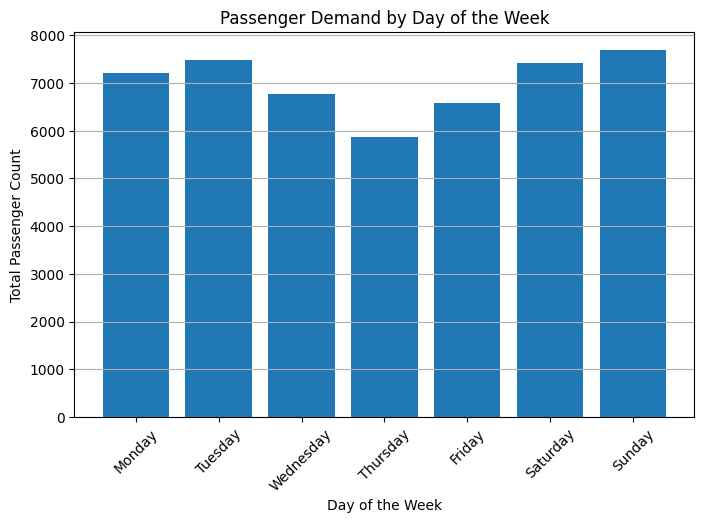

In [ ]:
# Aggregate passenger demand by day of the week
daily_demand = (
    df.groupby('Day_of_Week')['Passenger_Count']
      .sum()
      .reset_index()
)

# Ensure logical weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_demand['Day_of_Week'] = pd.Categorical(
    daily_demand['Day_of_Week'],
    categories=weekday_order,
    ordered=True
)
daily_demand = daily_demand.sort_values('Day_of_Week')

# Plot passenger demand by day of week
plt.figure(figsize=(8, 5))
plt.bar(daily_demand['Day_of_Week'], daily_demand['Passenger_Count'])
plt.title('Passenger Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Key observations:

- Passenger demand is highest on weekends, with Sunday recording the peak demand, followed closely by Saturday.

- Weekday demand is relatively stable, with Tuesday and Monday showing strong usage, likely reflecting regular commuter travel.

- Thursday shows the lowest passenger demand, indicating a mid-week dip in overall travel activity.

- The clear increase from Friday into the weekend suggests a shift from commuter-driven trips to leisure and discretionary travel.

Business insight:
MetroMove may benefit from increasing service capacity on weekends, particularly on Sundays, while reviewing whether Thursday schedules can be optimised to reduce underutilised capacity.

**Question 7: How does passenger demand compare between January and February 2024?**

Why this matters:
Although the dataset covers only January and February 2024, comparing passenger demand across these months helps MetroMove identify early-year demand shifts, detect short-term seasonality, and assess whether operational adjustments are needed as the year begins.

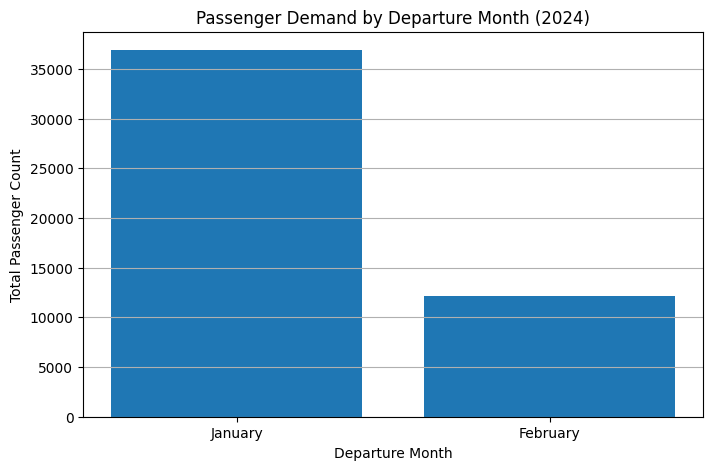

In [ ]:
# Aggregate passenger demand by departure month
monthly_demand = (
    df.groupby('Departure_Month')['Passenger_Count']
      .sum()
      .reindex(['January', 'February'])
)

# Plot passenger demand by month
plt.figure(figsize=(8, 5))
plt.bar(monthly_demand.index, monthly_demand.values)
plt.title('Passenger Demand by Departure Month (2024)')
plt.xlabel('Departure Month')
plt.ylabel('Total Passenger Count')
plt.grid(axis='y')
plt.show()


Key Observations:

Passenger demand in January 2024 is substantially higher than in February 2024. This difference is expected, as the dataset contains more operational days in January than February, rather than indicating a full seasonal trend.

Despite this limitation, the comparison provides a useful early-year snapshot of demand, showing that January accounts for the majority of recorded trips in the dataset. This reinforces the importance of contextualising time-based insights when working with partial-year data and avoids over-interpreting short-term variations as long-term seasonalit

**Question 8: How does passenger demand vary by day of the week across different modes of transport?**

Why this matters:
Understanding how demand fluctuates by day of the week and transport mode helps MetroMove optimise service frequency, staffing, and maintenance scheduling, particularly distinguishing weekday commuter patterns from weekend leisure travel.

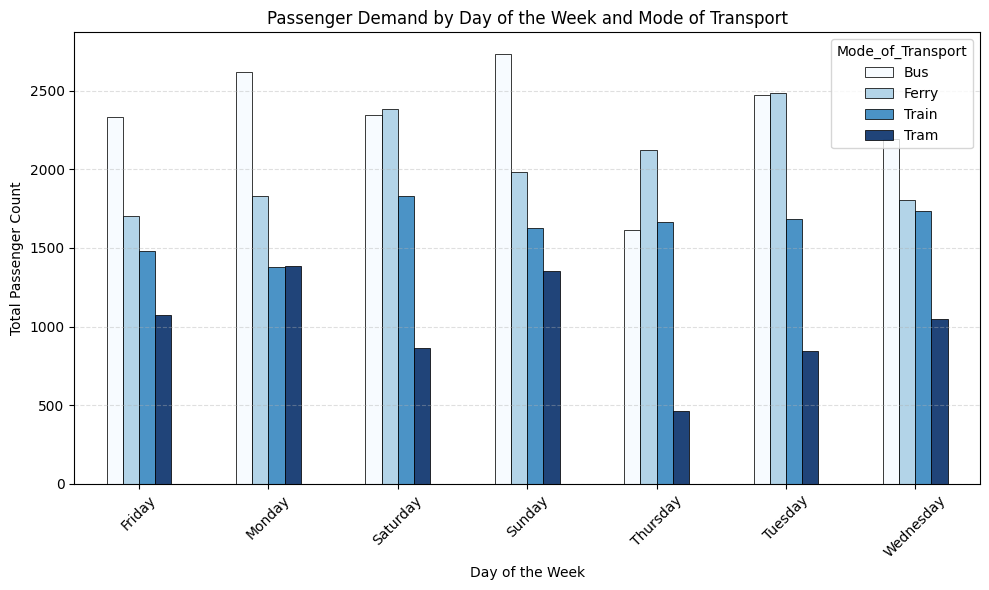

In [ ]:
daily_mode_pivot = (
    df.groupby(['Day_of_Week', 'Mode_of_Transport'])['Passenger_Count']
      .sum()
      .unstack()
)

daily_mode_pivot.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Blues',
    edgecolor='black',
    linewidth=0.6,
    alpha=0.9
)

plt.title('Passenger Demand by Day of the Week and Mode of Transport')
plt.xlabel('Day of the Week')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Key Observations:

- Bus services consistently record the highest passenger volumes across all days of the week.

- Passenger demand increases during weekends, particularly on Saturday and Sunday, across most transport modes.

- Weekday demand remains relatively stable, with minor peaks around Tuesday and Wednesday.

- Tram services show the lowest passenger demand, especially during midweek periods.

- Ferry usage increases towards the weekend, suggesting a shift towards leisure-based travel.

- Thursday shows a noticeable dip in demand across several modes compared to surrounding days.

Business Insights

MetroMove should prioritise bus capacity planning and service reliability, as buses form the backbone of passenger movement throughout the week. The higher weekend demand indicates an opportunity to optimise schedules and allocate additional resources during peak leisure periods, particularly for buses and ferries. Lower midweek tram usage suggests potential underutilisation, presenting opportunities for service optimisation or targeted interventions to improve demand. Overall, aligning operational planning with these demand patterns can improve efficiency while maintaining service quality.

# **5. OPERATIONAL AND SPATIAL INSIGHTS**

**Question 9: Do certain stations experience peak passenger demand at specific times of day?**

Why this matters:
Understanding when demand peaks at specific stations allows MetroMove to deploy staff, vehicles, and support services more effectively. Station-level peak patterns help prevent congestion, improve punctuality, and target operational resources where and when they are most needed.

In [ ]:
# --- Ensure Departure_Hour is usable ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert Departure_Hour (datetime.time) → datetime
df['Departure_Hour_dt'] = pd.to_datetime(
    df['Departure_Hour'].astype(str),
    format='%H:%M:%S',
    errors='coerce'
)




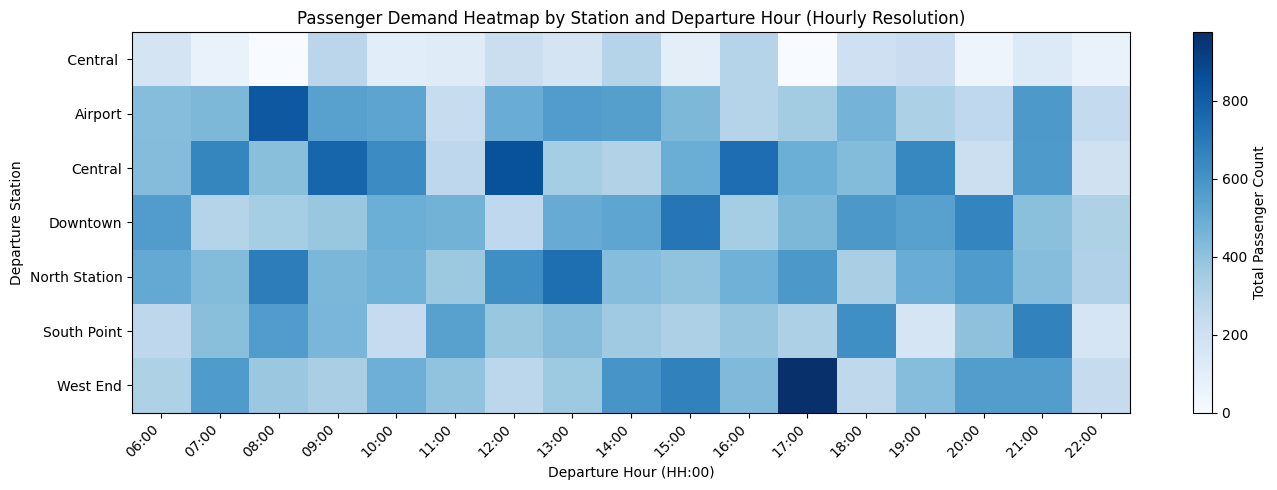

In [ ]:
# --- Hourly time bins (using Departure_Hour) ---

# Convert integer hour (0–23) into a datetime column so we can format labels cleanly
df["Departure_Hour_dt"] = pd.to_datetime(
    df["Departure_Hour"].astype(int).astype(str).str.zfill(2) + ":00",
    format="%H:%M",
    errors="coerce"
)

# Create hourly labels (HH:00)
df["Departure_Hour_1hr"] = df["Departure_Hour_dt"].dt.strftime("%H:00")

# Pivot table: Station x Hour
heat = (
    df.groupby(["Departure_Station", "Departure_Hour_1hr"])["Passenger_Count"]
      .sum()
      .unstack(fill_value=0)
)

# Ensure numeric matrix for heatmap
heat_numeric = heat.apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)

# Heatmap
plt.figure(figsize=(14, 5))
plt.imshow(heat_numeric.to_numpy(), aspect="auto", cmap="Blues")

plt.title("Passenger Demand Heatmap by Station and Departure Hour (Hourly Resolution)")
plt.xlabel("Departure Hour (HH:00)")
plt.ylabel("Departure Station")

plt.xticks(
    range(len(heat_numeric.columns)),
    heat_numeric.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(heat_numeric.index)),
    heat_numeric.index
)

plt.colorbar(label="Total Passenger Count")
plt.tight_layout()
plt.show()

Key Observations

- West End shows a pronounced demand spike in the late afternoon to early evening (17:00), standing out as the highest single peak across all stations.

- Central and Downtown exhibit relatively consistent demand throughout the day, with moderate increases during typical commuter periods.

- Airport demand is more evenly distributed, with smaller peaks spread across morning and evening periods rather than a single dominant spike.

- North Station shows intermittent peaks, suggesting fluctuating demand rather than sustained rush-hour pressure.

- Early morning (06:00–07:00) and late evening (after 21:00) periods generally show lower demand across all stations.

Business Insights

The results indicate that demand patterns are highly station-specific rather than uniform across the network. West End requires targeted operational attention during late-afternoon peak periods, while Central and Downtown benefit from steady all-day demand that supports consistent service levels. Airport travel appears less commuter-driven, suggesting different scheduling and resource strategies compared to inner-city stations. These insights enable MetroMove to move from network-wide assumptions to precision-based operational planning.

# **6. EDA Summary (Executive Overview)**

This exploratory data analysis assessed MetroMove’s transit operations to identify demand drivers, capacity pressures, and opportunities for service optimisation. After data validation and cleaning, the analysis combined descriptive, bivariate, temporal, and operational-spatial techniques to extract decision-relevant insights.

Across transport modes, passenger volumes were broadly comparable, with only marginal variation in fares and trip durations. Bivariate analysis showed no strong relationship between passenger count, fare level, or trip duration, indicating that demand is primarily shaped by network usage patterns and travel purpose rather than pricing or journey length.

Route-level analysis revealed that passenger demand is highly concentrated on a limited number of origin–destination pairs, particularly those connecting major hubs such as Airport, North Station, and Central. These corridors represent structurally important routes within the network.

Temporal analysis identified pronounced demand clustering during late-afternoon and early-evening periods.
Aggregation at hourly intervals provided the most actionable view of peak travel windows, aligned with the dataset’s temporal resolution. Demand was consistently higher on weekends, with Sunday recording the highest overall passenger volume. Monthly comparison indicated substantially higher demand in January than February, although this finding should be interpreted cautiously due to the limited observation period.

Operational and spatial analysis highlighted uneven demand distribution across stations. Certain stations, notably West End, experience sharp, time-specific demand surges, while others show more stable, evenly distributed passenger flows. These patterns point to location-specific capacity and staffing requirements.

# **7. STRATEGIC RECOMMENDATIONS**

- MetroMove should shift from uniform service planning to targeted, data-driven operational deployment.
- Resources should be concentrated on high-demand corridors and stations during clearly defined peak windows, particularly in the late afternoon and early evening.
- Stations exhibiting sharp demand spikes warrant dynamic staffing and capacity adjustments, while consistently high-volume routes should be prioritised for service reliability and optimisation.

To strengthen strategic planning, future analyses should incorporate a longer time horizon to capture seasonal effects and support more robust forecasting of demand trends.